In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
RANDOM_SEED = 8

In [2]:
orig_df = pd.read_csv('term-deposit-marketing-2020.csv')

In [3]:
df = orig_df.copy()

# Explanatory Data Analysis
This section covers the basic EDA

In [3]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')


# Univariate Data Analysis

# Target Variable
This variable is the 'y' variable which means whether the person has accepted the term deposit or not

no     92.76
yes     7.24
Name: y, dtype: float64


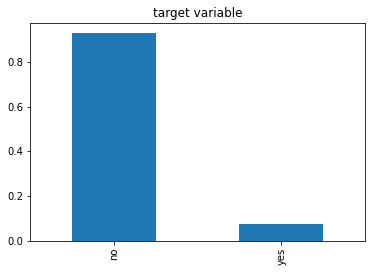

In [7]:
df["y"].value_counts(normalize=True).plot.bar(title = 'target variable')
print(df["y"].value_counts(normalize=True)*100)

Since the class distrubution is highly imbalance, we would have to deal with such a scenario in the final model building part

# AGE
age of customer (numeric)


C:\Users\Argedor\Anaconda3\envs\base1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


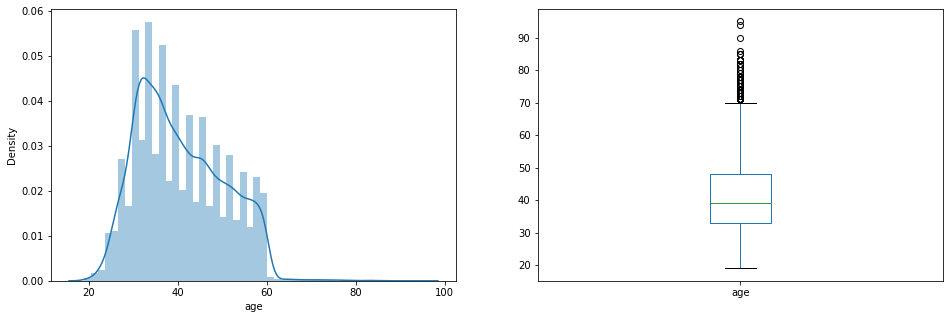

count    40000.000000
mean        40.544600
std          9.641776
min         19.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df["age"]);

plt.subplot(122)
df["age"].plot.box(figsize=(16,5))
plt.show()
print(df['age'].describe())

For the age variable, there are outliers which are users more than 70 age. The mean age of the users is around 40, with mininum age: 19 and maximum age: 95

# JOB
Type of job of the users(categorical)

blue-collar      0.234575
management       0.204150
technician       0.171300
admin            0.112075
services         0.097750
retired          0.035925
self-employed    0.035350
entrepreneur     0.035125
unemployed       0.027600
housemaid        0.027175
student          0.013100
unknown          0.005875
Name: job, dtype: float64


<AxesSubplot:title={'center':'job'}>

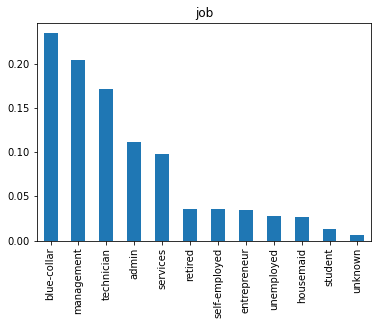

In [14]:
print(df["job"].value_counts(normalize=True))
df["job"].value_counts(normalize=True).plot.bar(title="job")

For the job variable, top three job types are: blue collar, management, technician.

# MARITAL
marital status (categorical)

married     0.609650
single      0.272225
divorced    0.118125
Name: marital, dtype: float64


<AxesSubplot:title={'center':'marital'}>

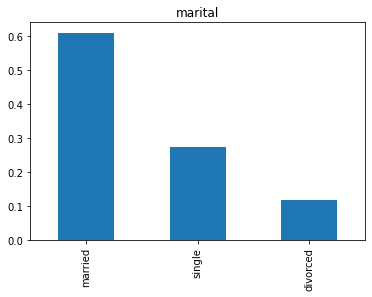

In [16]:
print(df["marital"].value_counts(normalize=True))
df["marital"].value_counts(normalize=True).plot.bar(title="marital")

# Education
Type of education(categorical)

secondary    0.524825
tertiary     0.280150
primary      0.156750
unknown      0.038275
Name: education, dtype: float64


<AxesSubplot:title={'center':'education'}>

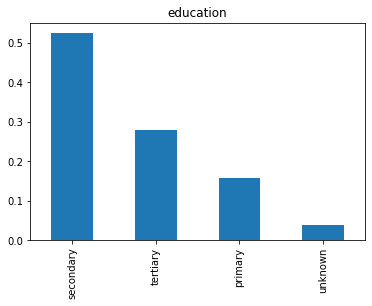

In [17]:
print(df["education"].value_counts(normalize=True))
df["education"].value_counts(normalize=True).plot.bar(title="education")

Most of the users were atleast have had secondary education

# default
has credit in default? (binary)

no     0.979775
yes    0.020225
Name: default, dtype: float64


<AxesSubplot:title={'center':'default'}>

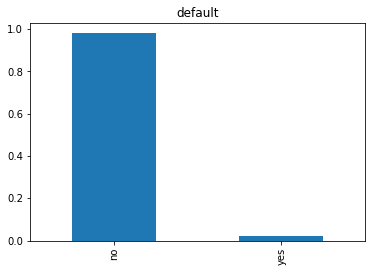

In [18]:
print(df["default"].value_counts(normalize=True))
df["default"].value_counts(normalize=True).plot.bar(title="default")

# Balance
average yearly balance, in euros (numeric)

C:\Users\Argedor\Anaconda3\envs\base1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


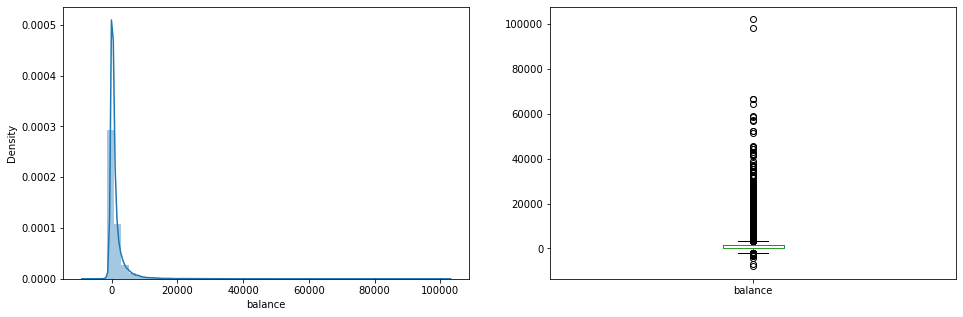

count     40000.000000
mean       1274.277550
std        2903.769716
min       -8019.000000
25%          54.000000
50%         407.000000
75%        1319.000000
max      102127.000000
Name: balance, dtype: float64


In [19]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df["balance"]);

plt.subplot(122)
df["balance"].plot.box(figsize=(16,5))
plt.show()
print(df['balance'].describe())

By seeing the probabilty distribution graph, I can infer that the distribution is highly towards left side. It is not an approximation of normal distribution. 

# housing
has a housing loan? (binary)

yes    0.600775
no     0.399225
Name: housing, dtype: float64


<AxesSubplot:title={'center':'housing'}>

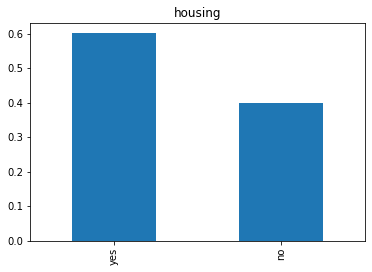

In [26]:
print(df["housing"].value_counts(normalize=True))
df["housing"].value_counts(normalize=True).plot.bar(title="housing")

60% of the users has taken a house loan, which means they have to pay monthly installements for the near future. This means they will most likely not take term deposit, as they require cash to pay the installement. I am assuming that housing will have a negative correlation with the term deposit.

# loan
has personal loan? (binary)

no     0.82675
yes    0.17325
Name: loan, dtype: float64


<AxesSubplot:title={'center':'loan'}>

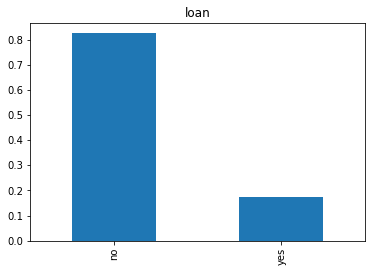

In [27]:
print(df["loan"].value_counts(normalize=True))
df["loan"].value_counts(normalize=True).plot.bar(title="loan")

For personal loans, most of the users did not pursue it, but those who did pursue it will most likely be less likely to apply for a term deposit

# CAMPAIGN VARIABLES
These variables include:
1. contact: contact communication type (categorical)
2. day: last contact day of the month (numeric)
3. month: last contact month of year (categorical)
4. duration: last contact duration, in seconds (numeric)
5. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

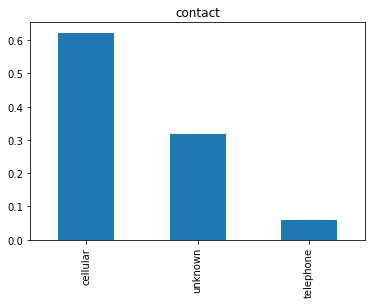

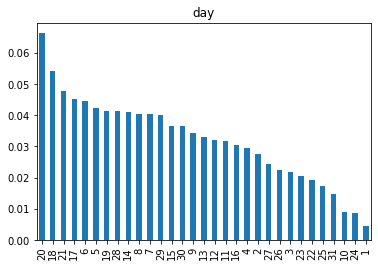

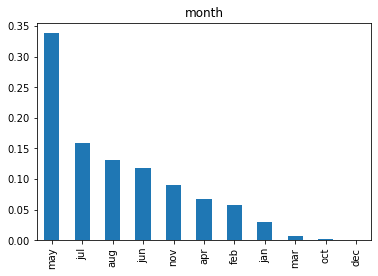

C:\Users\Argedor\Anaconda3\envs\base1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


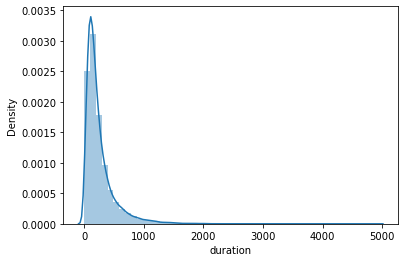

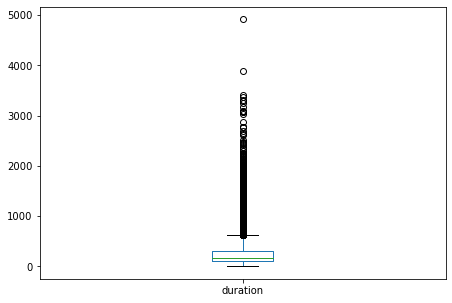

C:\Users\Argedor\Anaconda3\envs\base1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


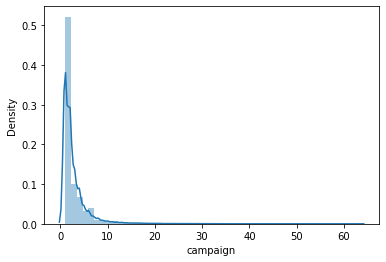

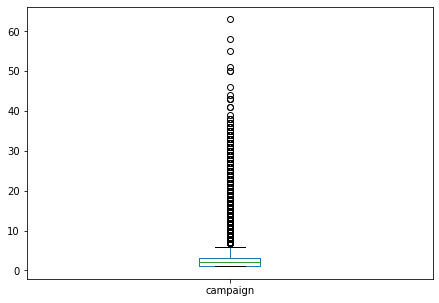

In [33]:
campaign_variable_cat = ['contact', 'day', 'month']
campaign_variable_num = ['duration', 'campaign']
for cat in campaign_variable_cat:
    #print(df[cat].value_counts(normalize=True))
    df[cat].value_counts(normalize=True).plot.bar(title=cat)
    plt.show()
for num in campaign_variable_num:
    sns.distplot(df[num]);
    plt.show()
    plt.subplot(122)
    df[num].plot.box(figsize=(16,5))
    plt.show()
#    print(df[num].describe())   

C:\Users\Argedor\Anaconda3\envs\base1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Argedor\Anaconda3\envs\base1\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Argedor\Anaconda3\envs\base1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

y           int64
age         int64
default     int32
balance     int64
housing     int32
loan        int32
duration    int64
campaign    int64
dtype: object


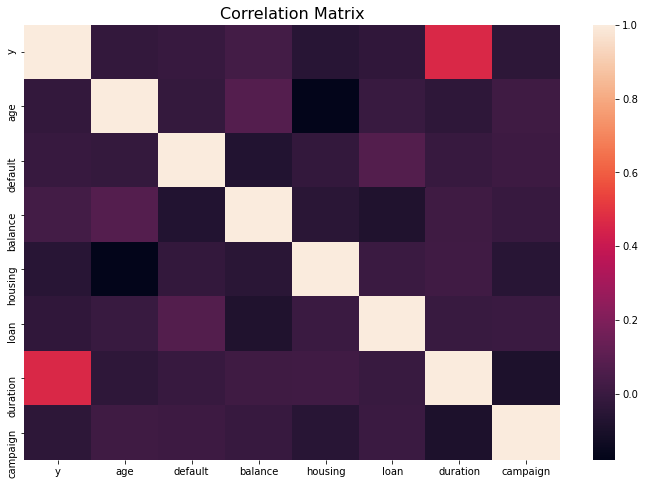

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
correlation_df = df[['y', 'age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign']]
correlation_df['y'] = LabelEncoder().fit_transform(correlation_df['y'])
correlation_df['default'] = LabelEncoder().fit_transform(correlation_df['default'])
correlation_df['housing'] = LabelEncoder().fit_transform(correlation_df['housing'])
correlation_df['loan'] = LabelEncoder().fit_transform(correlation_df['loan'])

#print(correlation_df.dtypes)

# Separate both dataframes into 
#numeric_df = correlation_df.select_dtypes(inc)
#categorical_df = df.select_dtypes(include="object")

corr_numeric = correlation_df.corr()
#corr_categorical = categorical_df.corr()

sns.heatmap(corr_numeric, cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()


For the correlation matrix, I chose just the numerical columns or binary-class columns(converted them to numerical with one hot encoding). The matrix shows that the variable 'duration' has the most correlation with the target variable. This information will be helpful for us in the model building part, where duration will play a vital feature in identifying the term deposit customers. 

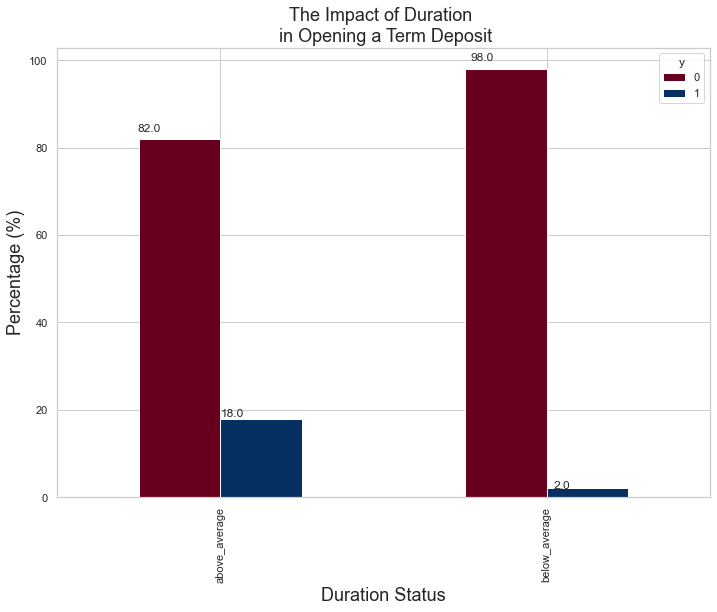

In [15]:
temp_df = df.copy()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = temp_df['duration'].mean()

lst = [temp_df]
temp_df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(temp_df['duration_status'], temp_df['y']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

Another analysis shows that if our client talks more with the user, explaning more about the benefits of the term deposits, there is a high chance that user will accept the term deposit offer as it can be seen in the graph that above average duration has a high turnout

# IMPORTANT
For classification purposes, I have removed day and month feature as I think it only adds noise to the model and provide not much information


In [4]:
df_preprocess = df.copy()
df_preprocess = df_preprocess.drop(['day', 'month'], axis=1)

# Preprocessing 

In [5]:
from sklearn.preprocessing import StandardScaler
all_columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y']
categorical_columns = ['job', 'marital', 'education', 'default', 'housing','loan','contact', 'month', 'y']
numerical_columms = ['age', 'balance', 'duration', 'campaign']
multi_class_columns = ['job', 'marital', 'education', 'contact']
binary_class_columns = ['default', 'housing', 'loan', 'y']
df_preprocess = pd.get_dummies(data=df_preprocess, columns=multi_class_columns)
for col in binary_class_columns:
    df_preprocess[col] = df_preprocess[col].map({'yes': 1, 'no': 0})

for num in numerical_columms:
    ss = StandardScaler().fit(df_preprocess[num].values.reshape(-1, 1))
    df_preprocess[num] = ss.transform(df_preprocess[num].values.reshape(-1, 1))


In [6]:
train_x = df_preprocess.loc[:, df_preprocess.columns != 'y']
train_y = df_preprocess['y']

In [7]:
train_x.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'job_admin', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown'],
      dtype='object')

# PCA ANALYSIS

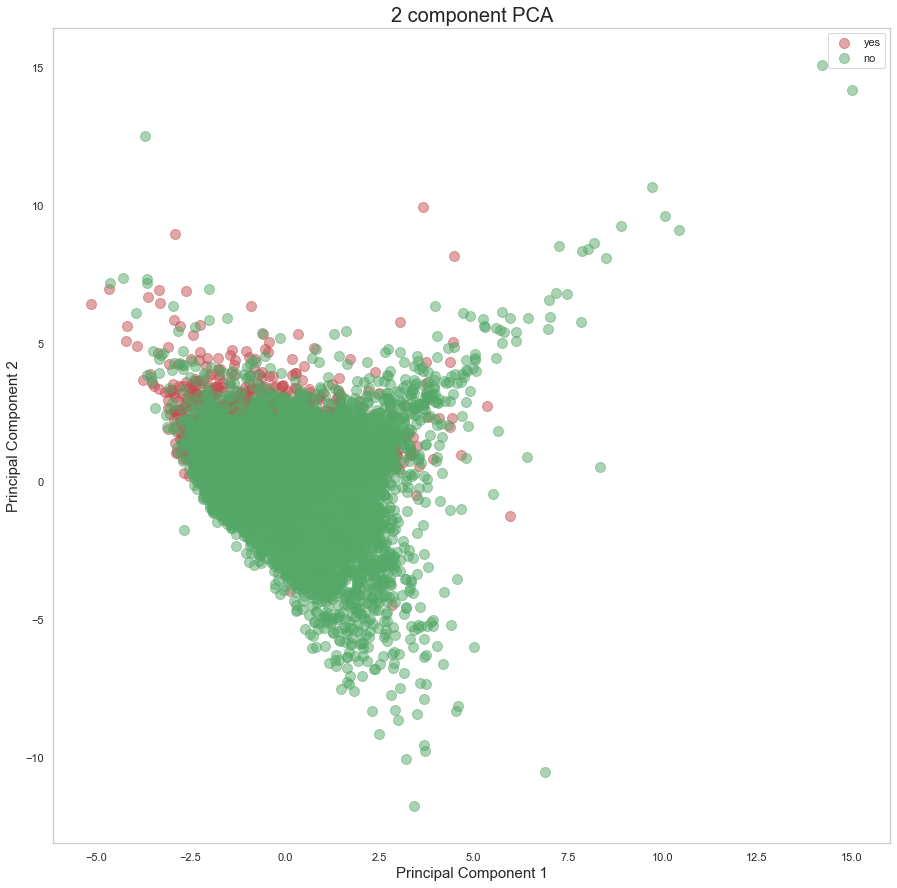

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['y']]], axis = 1)
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['yes', 'no']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 100, alpha=0.5)
ax.legend(targets)
ax.grid()

I did a PCA Analysis, reducing the components to 2, to visualize the data. The distribution does show that there is a non-linear relationship which can predict the term deposit users.

# Classification

Since the dataset is highly imbalanced, instead of accuracy, I will be using balanced accuracy which takes into account the frequency of each class label also into the accuracy. I think this is a better metric to choose in this scenario because of the imbalance.

In [9]:
# Machine learning pipeline
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.model_selection import cross_val_predict
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [10]:
def create_baseline_classifiers(RANDOM_SEED):
    """Create a list of baseline classifiers.
    
    Parameters
    ----------
    seed: (optional) An integer to set seed for reproducibility
    Returns
    -------
    A list containing tuple of name, model object for each of these algortihms:
    DummyClassifier, LogisticRegression, SGDClassifier, ExtraTreesClassifier, 
    GradientBoostingClassifier, RandomForestClassifier, MultinomialNB, SVC, 
    XGBClassifier.
    
    """
    models = []
    models.append(('catboost', CatBoostClassifier(random_state=RANDOM_SEED, verbose=0)))
    models.append(('lightgbm', lgb.LGBMClassifier(random_state=RANDOM_SEED, class_weight='balanced')))
    models.append(('dum', DummyClassifier(random_state=RANDOM_SEED, strategy='most_frequent')))
    models.append(('etc', ExtraTreesClassifier(random_state=RANDOM_SEED, class_weight='balanced')))
    models.append(('gbm', GradientBoostingClassifier(random_state=RANDOM_SEED)))
    models.append(('rfc', RandomForestClassifier(random_state=RANDOM_SEED, class_weight='balanced')))
    models.append(('xgb', XGBClassifier(seed=RANDOM_SEED, class_weight='balanced')))
    models.append(('mpl', MLPClassifier(alpha=1, random_state=RANDOM_SEED)))
    
    return models

def assess_models(X, y, models, cv, RANDOM_SEED, metrics=['roc_auc', 'f1', 'accuracy', 'balanced_accuracy', 'precision', 'recall']):

    summary = pd.DataFrame()
    for name, model in models:
        print('training on: '+name)
        result = pd.DataFrame(cross_validate(model, X, y, cv=cv, scoring=metrics, verbose=0, n_jobs=4))
        mean = result.mean().rename('{}_mean'.format)
        std = result.std().rename('{}_std'.format)
        summary[name] = pd.concat([mean], axis=0)
    return summary.sort_index()
def confusion_matrix_allmodels(models, x, y, cv, RANDOM_SEED):
    
    for name, model in models:
        y_train_pred = cross_val_predict(model, x, y, cv=cv)
        conf_matrix = confusion_matrix(y, y_train_pred)
        f, ax = plt.subplots(figsize=(6, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
        plt.title("Confusion Matrix for model: "+str(name), fontsize=20)
        plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
        ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
        ax.set_xticklabels("")
        ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
        plt.show()


In [11]:
folds = 5
summary = pd.DataFrame()
cv = KFold(n_splits=folds, random_state=RANDOM_SEED)


C:\Users\Argedor\Anaconda3\envs\base1\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


I ran several models on the dataset to check which model can have the highest predictive power for this problem.

In [12]:
models = create_baseline_classifiers(RANDOM_SEED)
summary = assess_models(train_x, train_y, models, RANDOM_SEED=RANDOM_SEED, cv=cv)
summary

training on: catboost
training on: lightgbm
training on: dum
training on: etc
training on: gbm
training on: rfc
training on: xgb
training on: mpl


,catboost,lightgbm,dum,etc,gbm,rfc,xgb,mpl
fit_time_mean,40.146237,0.458990,0.013005,3.486633,4.617706,3.159034,3.654812,7.247481
score_time_mean,0.164563,0.138144,0.020855,0.384171,0.052681,0.308041,0.108115,0.068092
test_accuracy_mean,0.928950,0.830375,0.927600,0.924750,0.931400,0.928000,0.927875,0.932925
test_balanced_accuracy_mean,0.646524,0.831669,0.500000,0.589947,0.660315,0.580481,0.645993,0.667379
test_f1_mean,0.383926,0.400107,0.000000,0.270328,0.414583,0.255999,0.380656,0.420558
test_precision_mean,0.527966,0.271078,0.000000,0.459067,0.557426,0.509725,0.513025,0.571772
test_recall_mean,0.313773,0.829930,0.000000,0.197625,0.340813,0.174022,0.314067,0.352633
test_roc_auc_mean,0.899571,0.901956,0.500000,0.856620,0.902504,0.884108,0.893036,0.903338


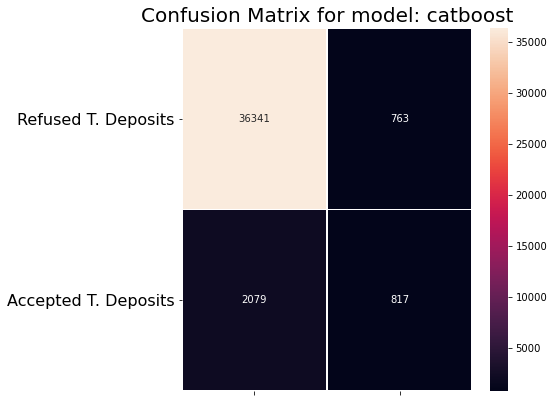

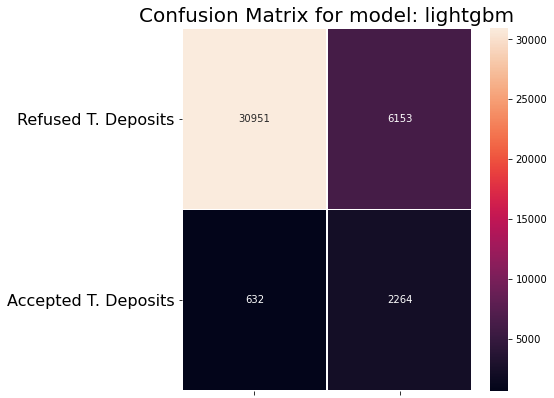

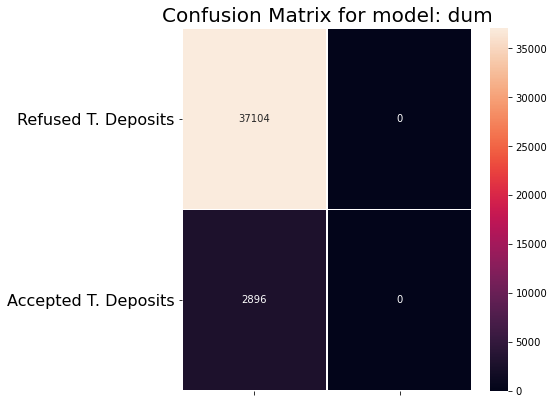

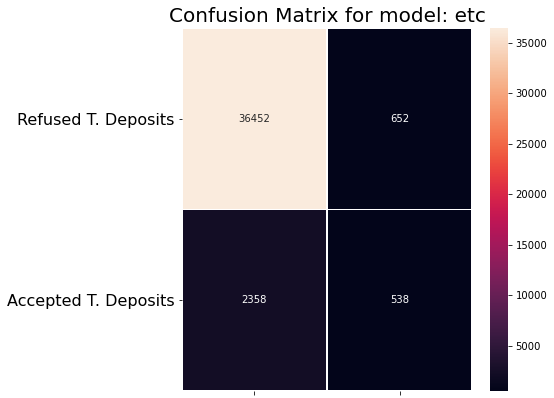

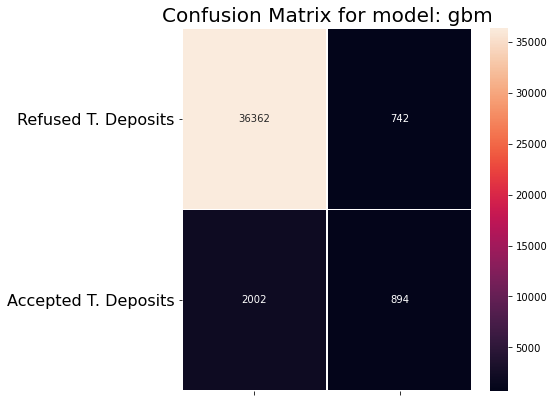

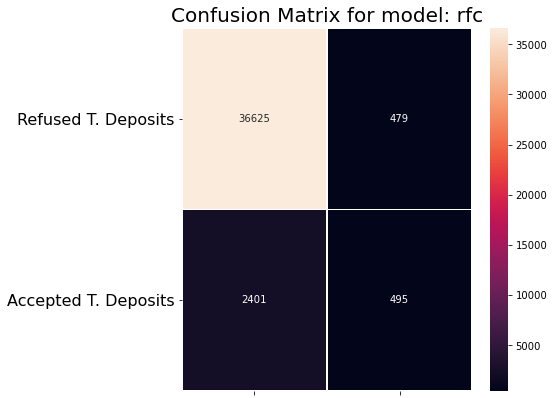

[01:35:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:35:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:35:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in la

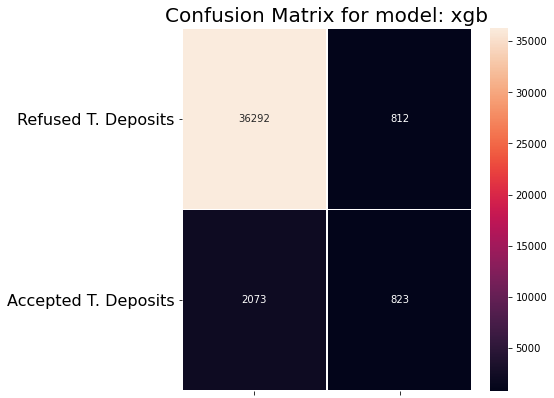

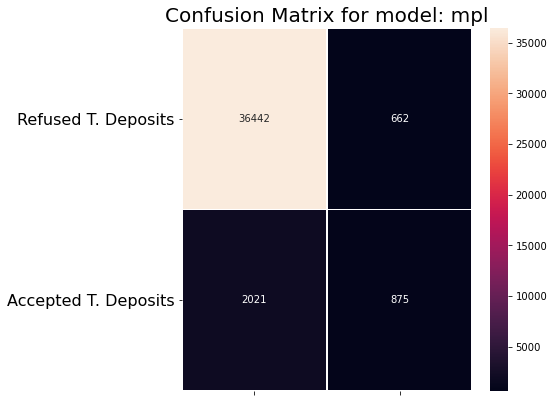

In [13]:
confusion_matrix_allmodels(models, train_x, train_y, RANDOM_SEED=RANDOM_SEED, cv=cv)

With these results, I think lightgbm model is the best model with respect to the balanced accuracy and roc_auc metric. I will do hyperparameter optimization on lightgbm to find the best set of parameters for this model

# BEST MODEL:
Choosing NN, lightgbm, gbm


In [14]:
from sklearn.metrics import classification_report
def performance_metrics_sheet(model, train_x, train_y, cv, name):
    scoring = ['accuracy', 'balanced_accuracy', 'roc_auc']
    results = cross_validate(model, train_x, train_y, cv=cv, scoring=scoring)
    results = pd.DataFrame(results)
    print("AUC: %.3f (%.3f)" % (results['test_roc_auc'].mean(), results['test_roc_auc'].std()))
    print("test_accuracy: : %.3f (%.3f)" % (results['test_accuracy'].mean(), results['test_accuracy'].std()))
    print("balanced test_accuracy: : %.3f (%.3f)" % (results['test_balanced_accuracy'].mean(), results['test_balanced_accuracy'].std()))
    y_train_pred = cross_val_predict(model, train_x, train_y, cv=cv)
    print(classification_report(train_y, y_train_pred))
    conf_matrix = confusion_matrix(train_y, y_train_pred)
    f, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
    plt.title("Confusion Matrix for model: "+ str(name), fontsize=20)
    plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
    ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
    ax.set_xticklabels(["Predicted 0", "Predicted 1"], fontsize=16, rotation=360)
    ax.set_yticklabels(['True 0','True 1'], fontsize=16, rotation=360)
    plt.show()

# LIGHTGBM

The following cell is for hyper parameter optimization. It takes quite some time to find the most optimum parameters. No need to run it, I have copied the optimized parameter in the subsequent cell.

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}
n_HP_points_to_test = 100

clf = lgb.LGBMClassifier(max_depth=-1, random_state=RANDOM_SEED, silent=True, n_jobs=-1, n_estimators=5000, class_weight='balanced')
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='balanced_accuracy',
    cv=cv,
    refit=False,
    random_state=RANDOM_SEED,
    verbose=True)
gs.fit(train_x, train_y)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 52.7min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=8, shuffle=False),
                   estimator=LGBMClassifier(class_weight='balanced',
                                            n_estimators=5000, random_state=8),
                   n_iter=100,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C3965FC160>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0...
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C39660CA58>,
                                        'reg_alpha': [0,

best params:  {'colsample_bytree': 0.8670067064613427, 'min_child_samples': 107, 'min_child_weight': 0.001, 'num_leaves': 34, 'reg_alpha': 50, 'reg_lambda': 100, 'subsample': 0.9319772815385636}
AUC: 0.906 (0.073)
test_accuracy: : 0.812 (0.066)
balanced test_accuracy: : 0.838 (0.082)
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     37104
           1       0.25      0.82      0.39      2896

    accuracy                           0.81     40000
   macro avg       0.62      0.82      0.64     40000
weighted avg       0.93      0.81      0.85     40000



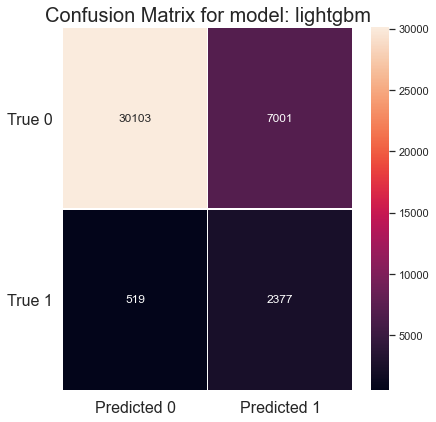

In [50]:
#best_params = gs.best_params_
best_params = {'colsample_bytree': 0.8670067064613427, 'min_child_samples': 107, 'min_child_weight': 0.001, 'num_leaves': 34, 'reg_alpha': 50, 'reg_lambda': 100, 'subsample': 0.9319772815385636}
print('best params: ', best_params)
#print('best balanced accuracy: ', gs.best_score_)
optimized_lightgbm_est = lgb.LGBMClassifier(**best_params, random_state=RANDOM_SEED, class_weight='balanced')
performance_metrics_sheet(optimized_lightgbm_est, train_x, train_y, cv, 'lightgbm')

# What makes the customers buy? Tell us which feature we should be focusing more on.

# Feature Importance

In [45]:
dataframe = df.copy()
all_columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y']
dataframe['job'] = dataframe['job'].astype('category').cat.codes
dataframe['marital'] = dataframe['marital'].astype('category').cat.codes
dataframe['education'] = dataframe['education'].astype('category').cat.codes
dataframe['default'] = dataframe['default'].astype('category').cat.codes
dataframe['housing'] = dataframe['housing'].astype('category').cat.codes
dataframe['loan'] = dataframe['loan'].astype('category').cat.codes
dataframe['contact'] = dataframe['contact'].astype('category').cat.codes
dataframe['month'] = dataframe['month'].astype('category').cat.codes
dataframe['campaign'] = dataframe['campaign'].astype('category').cat.codes
dataframe['y'] = dataframe['y'].astype('category').cat.codes
numerical_columms = ['age', 'balance', 'duration', 'campaign']
for num in numerical_columms:
    ss = StandardScaler().fit(dataframe[num].values.reshape(-1, 1))
    dataframe[num] = ss.transform(dataframe[num].values.reshape(-1, 1))
TRAIN_X = dataframe.loc[:, dataframe.columns != 'y']
TRAIN_Y = dataframe['y']


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

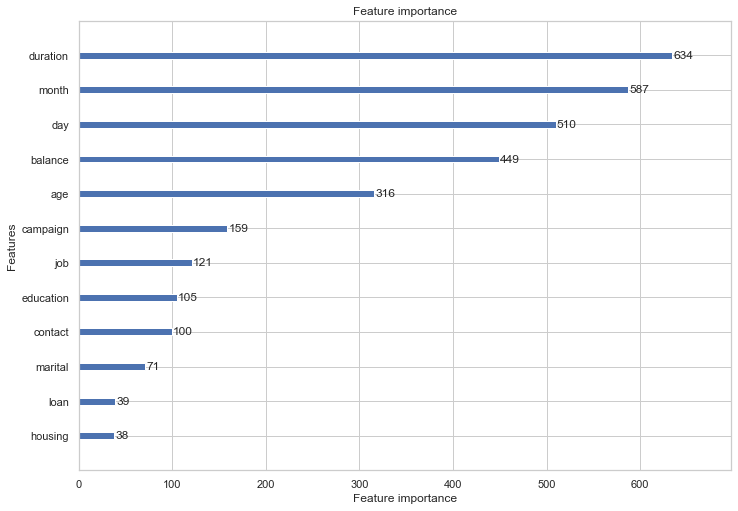

In [46]:

optimized_lightgbm_est.fit(TRAIN_X, TRAIN_Y)
lgb.plot_importance(optimized_lightgbm_est)


Duration is the most important feature that leads to high term deposit subscriber. This is because a call can make the user more informed about the process and the benefits of the term deposit scheme

# Q2 We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

# Job

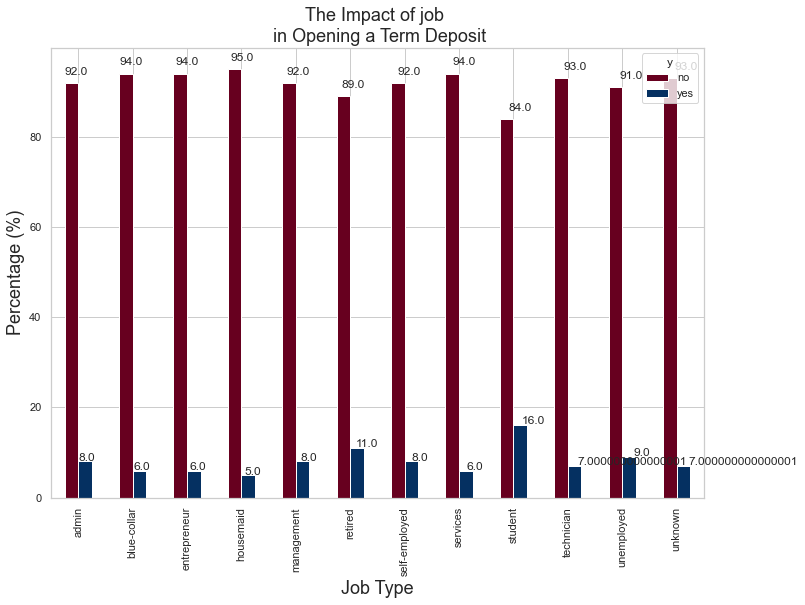

In [47]:
temp_df = df.copy()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
#avg_duration = temp_df['duration'].mean()

lst = [temp_df]
temp_df["job_status"] = np.nan
for job in temp_df['job'].unique():
    for col in lst:
        col.loc[col["job"] == job, "job_status"] = job
        #col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(temp_df['job_status'], temp_df['y']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of job \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Job Type", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

As can be seen in the above graph, students and retired people have the highest turnout rate with 16% and 11%, respectively. This also makes sense because students are finding ways to earn some money while studying and retired people mostly dont have jobs so they also look for such opppurtunites in the same way.